In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
NOT_AVAILABLE = "Not Available"
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
sns.set_theme(style='whitegrid',)
df = pd.read_excel("C://Users//CWC//GEOsystems//BidAssist//Tenders//Rerun 3//Concatenated DF.xlsx")
df.head(3)

,Description,Authority,Stage,Contract Date,Contract Amount,City,URL,Tender_ID,State,Categories,numeric_amount
0,Construction Of U/g Cement Concrete Np Two Pip...,Rural Development Department,AOC,9 Nov 2023,₹ 1 Lac,Yavatmal,https://bidassist.com/tender-results/all-tende...,2022_YAVAT_864176_1,Maharashtra,"Drainage Work, Construction Material",100000.0
1,Construction Of U/g Cement Concrete Np Two Pip...,Rural Development Department,AOC,9 Nov 2023,₹ 2.3 Lac,Yavatmal,https://bidassist.com/tender-results/all-tende...,2022_YAVAT_864151_1,Maharashtra,"Drainage Work, Construction Material",230000.0
2,Construction Of Community Sanitation Complex M...,Rural Development Department,AOC,9 Nov 2023,₹ 3 Lac,Yavatmal,https://bidassist.com/tender-results/all-tende...,2022_YAVAT_863738_1,Maharashtra,Other Equipments,300000.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35743 entries, 0 to 35742
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Description      35743 non-null  object 
 1   Authority        35743 non-null  object 
 2   Stage            35743 non-null  object 
 3   Contract Date    35743 non-null  object 
 4   Contract Amount  35743 non-null  object 
 5   City             35743 non-null  object 
 6   URL              35743 non-null  object 
 7   Tender_ID        35743 non-null  object 
 8   State            35743 non-null  object 
 9   Categories       35743 non-null  object 
 10  numeric_amount   35743 non-null  float64
dtypes: float64(1), object(10)
memory usage: 3.0+ MB


In [3]:
df[df['Categories'] == NOT_AVAILABLE].shape

(223, 11)

In [4]:
df['Stage'].value_counts()

Stage
AOC                      24280
Financial Evaluation     10481
Not Available              960
Financial Bid Opening       14
Awarded                      6
Technical Bid Opening        1
Technical Evaluation         1
Name: count, dtype: int64

In [5]:
def unknowns_by_column():
    unknown_dict = {}
    for col in list(df.columns):
        unknown_dict[col] = df[df[col] == NOT_AVAILABLE].shape[0]
    return unknown_dict
unknowns_by_column()

{'Description': 0,
 'Authority': 0,
 'Stage': 960,
 'Contract Date': 0,
 'Contract Amount': 93,
 'City': 0,
 'URL': 0,
 'Tender_ID': 0,
 'State': 0,
 'Categories': 223,
 'numeric_amount': 0}

In [6]:
data = df.groupby('City')['Authority'].value_counts().reset_index()
pivot_data = data.pivot(columns='City', index='Authority', values="count").reset_index()
cols_list = list(pivot_data.columns)[1:]
pivot_data[cols_list] = pivot_data[cols_list].fillna(0).astype(int)
pivot_data['Total'] = pivot_data[cols_list].sum(axis=1)
pivot_data = pivot_data.sort_values(by='Total', ascending=False)
pivot_data.head()

City,Authority,Akola,Amravati,Balaghat,Bhandara,Buldana,Chandrapur,Chhindwara,Gadchiroli,Gondia,Multi-City,Nagpur,Wardha,Washim,Yavatmal,Total
146,Rural Development Department,527,998,0,391,2828,1388,1,1757,784,0,2532,778,1406,3214,16604
140,Public Works Department,265,576,139,98,841,488,159,340,175,0,1093,284,119,624,5201
42,Directorate Of Municipal Administration,243,504,0,106,661,284,0,352,101,0,855,281,264,527,4178
116,Municipal Corporation,214,488,0,0,1,163,0,1,0,0,1107,1,0,0,1975
172,Western Coalfields Limited,0,0,0,5,0,481,267,1,0,0,393,0,0,153,1300


In [7]:
df[df['Stage'] == 'Awarded']

,Description,Authority,Stage,Contract Date,Contract Amount,City,URL,Tender_ID,State,Categories,numeric_amount
10486,Ciwil Work,Rural Development Department,Awarded,26 Jul 2023,₹ 4.9 Lac,Gondia,https://bidassist.com/tender-results/all-tende...,2023_GONDI_925224_1,Maharashtra,"Civil Works Others, Civil Works",490000.0
10830,Addition And Alteration To Honable High Court ...,Public Works Department,Awarded,7 Jul 2023,₹ 1.2 Cr,Nagpur,https://bidassist.com/tender-results/all-tende...,2023_PWR_879584_1,Maharashtra,"Civil Works Others, Civil Works",12000000.0
18054,Construction Of Concrete Road In Prabhag No 01...,Directorate Of Municipal Administration,Awarded,12 Sep 2023,₹ 9.3 Lac,Amravati,https://bidassist.com/tender-results/all-tende...,2021_DMA_727809_39,Maharashtra,"Road Construction, Construction Material",930000.0
18834,Construction Of Retaining Wall For Protecting ...,Water Resources Department,Awarded,30 Jul 2023,₹ 27.9 Lac,Bhandara,https://bidassist.com/tender-results/all-tende...,2023_CEWRD_887869_5,Maharashtra,Drainage Work,2790000.0
18941,Annual Maintenance And Repairs To Chinchargava...,Public Works Department,Awarded,26 Jul 2023,₹ 19.2 Lac,Amravati,https://bidassist.com/tender-results/all-tende...,2023_PWR_912043_1,Maharashtra,"Road Construction, Civil Works",1920000.0
27142,Construction Of Aanganwadi Building At Zotinga...,Rural Development Department,Awarded,25 Jul 2023,₹ 9.2 Lac,Buldana,https://bidassist.com/tender-results/all-tende...,2023_BULDH_889241_28,Maharashtra,Building Construction,920000.0


In [8]:
def unique_work_categories():
    k = []
    for i in list(df['Categories']):
        for j in list(i.split(',')):
            k.append(j.strip())
    return list(set(k))
# unique_work_categories()

In [9]:
def pivot_data(data, amount, percent=False, heatmap=False):
    """Returns a pivot table with count of tenders by
        Authority and Cities"""
    amount_filter = data.loc[data['numeric_amount'] >= amount]
    group_by = amount_filter.groupby('City')['Authority'].value_counts().reset_index()
    pivot_data = group_by.pivot(columns='City', index='Authority', values="count").reset_index()
    cols_list = list(pivot_data.columns)[1:]
    pivot_data[cols_list] = pivot_data[cols_list].fillna(0).astype(int)
    pivot_data['Total'] = pivot_data[cols_list].sum(axis=1)
    col_order = ['Authority', 'Balaghat', 'Chhindwara', 'Akola', 'Amravati', 'Buldana', 'Washim', 'Yavatmal',
                 'Bhandara', 'Chandrapur', 'Gadchiroli', 'Gondia', 'Nagpur', 'Wardha', 'Multi-City', 'Total']
    cities = col_order[1:-1]
    pivot_data = pivot_data[col_order]       
    
    pivot_data = pivot_data.sort_values(by='Total', ascending=False)
    pivot_data.reset_index(drop=True, inplace=True)
    
    if heatmap:
        plt.figure(figsize=(14, 5))
        ax = sns.heatmap(data=pivot_data[cities].head(10))
        y_labels = pivot_data['Authority'].head(10)
        ax.set_yticks(range(len(y_labels)))  # Set the tick locations
        ax.set_yticklabels(y_labels, rotation=0, verticalalignment='top')  # Set the tick labels
        plt.xticks(rotation=40)
        plt.title('City V Authority Heatmap')
        return plt.show()
    
    if percent:
        '''If percent is True, values will be returned as percentages of the total'''
        pivot_data[cols_list] = (round(pivot_data[cols_list].div(pivot_data[cols_list].sum(axis=1), axis=0) * 100, 1))
        pivot_data[cols_list] = pivot_data[cols_list].astype(str) + "%"

    return pivot_data
# pivot_data(df, 1e7,)
above_5cr = pivot_data(df, 5e7,)
# above_5cr.to_excel('Tenders Above 5 Cr.xlsx', index=True)

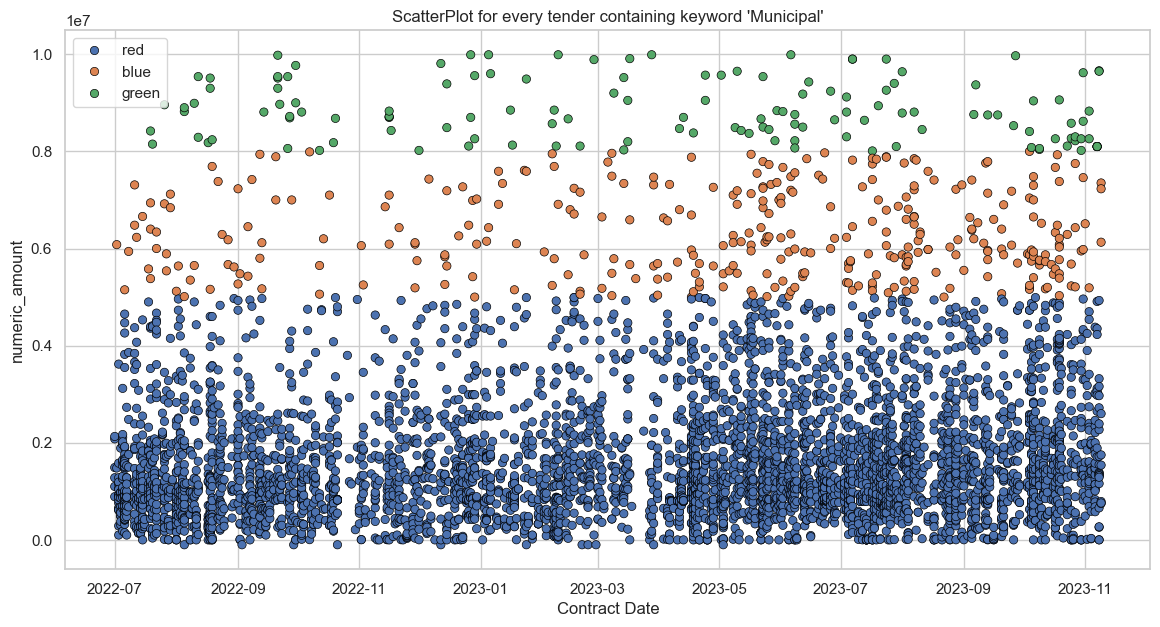

In [10]:
def date_v_amount_by_authority(string_value, under_amount):
    df['Contract Date'] = pd.to_datetime(df['Contract Date'])
    plt.figure(figsize=(14,7))
    data = df[(df['Authority'].str.contains(string_value)) & 
                (df['numeric_amount'] < under_amount)].sort_values(by='Contract Date')
    sns.scatterplot(data=data, x='Contract Date', y='numeric_amount',
              edgecolors='BLACK',
              hue=np.where((data['numeric_amount']<=8e6) & (data['numeric_amount']>=5e6), 'blue',
                    np.where((data['numeric_amount']<=1e7) & (data['numeric_amount']>=8e6), 'green', 'red')))
    plt.xticks(horizontalalignment='center')
    plt.title(f"ScatterPlot for every tender containing keyword '{string_value}'")
    plt.show()
date_v_amount_by_authority('Municipal', 1e7)

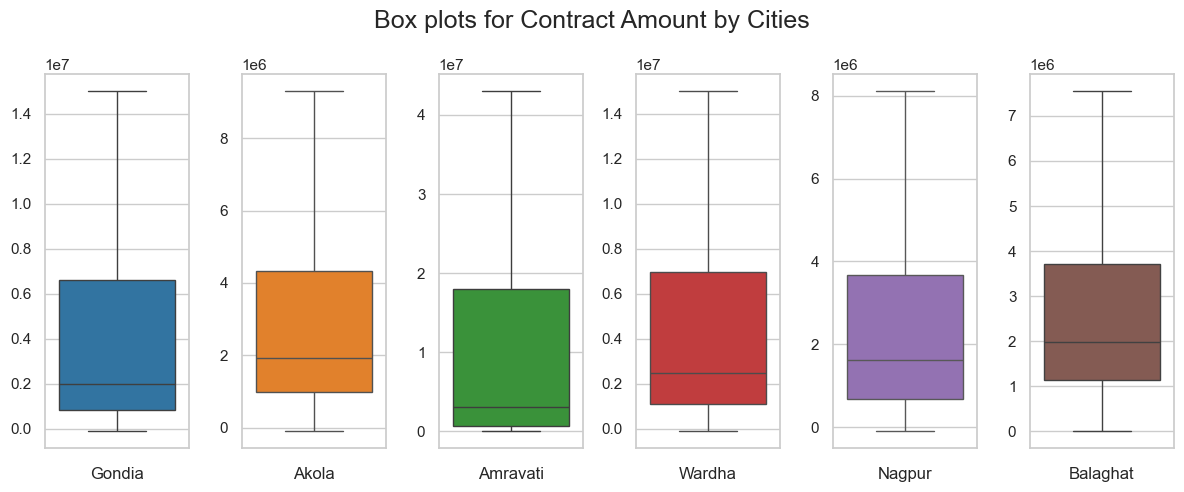

In [11]:
sales_cities = ['Gondia', 'Akola', 'Amravati', 'Wardha', 'Nagpur', "Balaghat"]

fig, axs = plt.subplots(1, len(sales_cities), figsize=(12, 5), sharex=True)

for i, city in enumerate(sorted(sales_cities)):
    data = df[df['City'] == city]
    sns.boxplot(y=data['numeric_amount'], showfliers=False,
                      ax=axs[i], color=color_pal[i])
    axs[i].set_xlabel(sales_cities[i])
    axs[i].set_ylabel("")

fig.suptitle('Box plots for Contract Amount by Cities', fontsize=18)
plt.tight_layout()
plt.show()

In [12]:
print(df.shape)
print(df[df['numeric_amount'] < 100].shape)
print(df[df['numeric_amount'] < 1e5].shape)

(35743, 11)
(298, 11)
(2554, 11)


In [13]:
ngp = df.loc[df['City'] == 'Nagpur']
print(len(ngp[ngp['numeric_amount'] < 5e4]) / len(ngp) * 100)

7.8214523650899395


In [14]:
ngp.describe(include='all')

,Description,Authority,Stage,Contract Date,Contract Amount,City,URL,Tender_ID,State,Categories,numeric_amount
count,7505,7505,7505,7505,7505,7505,7505,7505,7505,7505,7.505000e+03
unique,7303,98,6,NaN,1464,1,7505,7505,1,1213,NaN
top,Custom Bid For Services,Rural Development Department,AOC,NaN,₹ 9.9 Lac,Nagpur,https://bidassist.com/tender-results/all-tende...,2023_NAGPU_936708_1,Maharashtra,"Road Construction, Civil Works",NaN
freq,72,2532,5603,NaN,77,7505,1,1,7505,910,NaN
mean,NaN,NaN,NaN,2023-03-27 13:31:02.598267904,NaN,NaN,NaN,NaN,NaN,NaN,9.467329e+06
min,NaN,NaN,NaN,2022-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-9.999900e+04
25%,NaN,NaN,NaN,2022-11-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.800000e+05
50%,NaN,NaN,NaN,2023-04-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.630000e+06
75%,NaN,NaN,NaN,2023-08-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3.670000e+06
max,NaN,NaN,NaN,2023-11-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.146900e+10


In [15]:
ngp['numeric_amount'].describe()

count    7.505000e+03
mean     9.467329e+06
std      1.467152e+08
min     -9.999900e+04
25%      6.800000e+05
50%      1.630000e+06
75%      3.670000e+06
max      1.146900e+10
Name: numeric_amount, dtype: float64

In [16]:
ngp['numeric_amount'].mean()

9467328.823528314

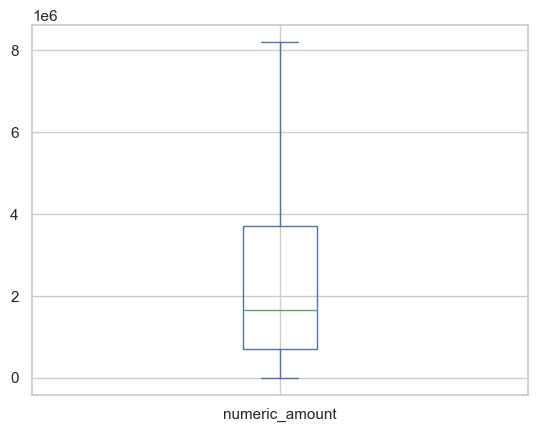

In [40]:
ngp['numeric_amount'].plot(kind='box', showfliers=False)
plt.show()

Mean of ngp_without_outlier: 5587756
Median of ngp_without_outlier: 5340000


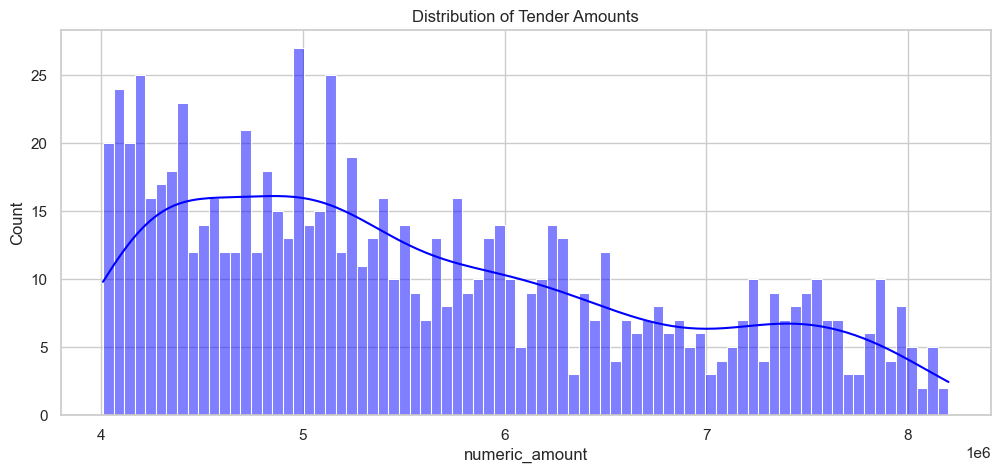

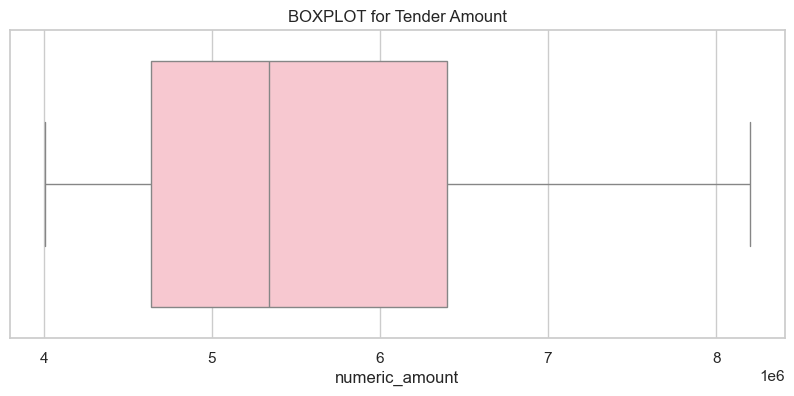

In [95]:
ngp_without_NA = ngp.loc[ngp['numeric_amount'] > 4e6].copy()

lower_quartile = ngp['numeric_amount'].quantile(0.25)
upper_quartile = ngp['numeric_amount'].quantile(0.75)

iqr = upper_quartile - lower_quartile

lower_limit = lower_quartile - 1.5 * iqr
upper_limit = upper_quartile + 1.5 * iqr

ngp_without_outlier = ngp_without_NA[(ngp_without_NA['numeric_amount'] >= lower_limit) &
                                     (ngp_without_NA['numeric_amount'] <= upper_limit)]
# iqr
print("Mean of ngp_without_outlier:", round(ngp_without_outlier['numeric_amount'].mean()))
print("Median of ngp_without_outlier:", round(ngp_without_outlier['numeric_amount'].median()))

plt.figure(figsize=(12,5))
sns.histplot(data=ngp_without_outlier, x='numeric_amount', color='blue', kde=True, bins=80)
plt.title('Distribution of Tender Amounts')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=ngp_without_outlier['numeric_amount'], showfliers=False, color='pink',)
plt.title('BOXPLOT for Tender Amount')
plt.show()

In [91]:
print(ngp.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7447 entries, 8295 to 17162
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Description      7447 non-null   object        
 1   Authority        7447 non-null   object        
 2   Stage            7447 non-null   object        
 3   Contract Date    7447 non-null   datetime64[ns]
 4   Contract Amount  7447 non-null   object        
 5   City             7447 non-null   object        
 6   URL              7447 non-null   object        
 7   Tender_ID        7447 non-null   object        
 8   State            7447 non-null   object        
 9   Categories       7447 non-null   object        
 10  numeric_amount   7447 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 698.2+ KB
None
